# Proyek Analisis Data: bike-sharing-dataset
- **Nama:** Ardhian Jaya Wibawa
- **Email:** ardhianjayawibawa@gmail.com
- **ID Dicoding:** ardhian_jaya_wibawa

## Menentukan Pertanyaan Bisnis

### 1. Di musim apa frekuensi penyewaan sepeda paling tinggi?
### 2. Pada jam berapa penyewaan sepeda mencapai puncak tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Memasukkan data day.csv dan data hour.csv

In [2]:
day_data = pd.read_csv("data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_data = pd.read_csv("data/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Insight:**

File *hour.csv* berisi data lengkap tentang penyewaan sepeda setiap jam, seperti tanggal, musim, hari dalam seminggu, kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah pengguna—baik yang terdaftar maupun yang tidak. Sementara itu, file *day.csv* memberikan data dalam skala yang lebih luas, yakni jumlah penyewaan per hari. Meskipun informasi dasarnya mirip dengan *hour.csv*, data harian ini membantu kita melihat pola penggunaan sepeda dalam jangka waktu yang lebih panjang. Misalnya, bagaimana musim, hari libur, atau perbedaan antara hari kerja dan akhir pekan memengaruhi tren penyewaan sepeda.

### Assessing Data

### menilai data day.csv

In [5]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### menilai data hour.csv

In [6]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### melihat apakah data day.csv dan hour.csv ada duplikatnya atau tidak

In [7]:
print("data day duplicate: ", day_data.duplicated().sum())

data day duplicate:  0


In [8]:
print("data hour duplicate: ", hour_data.duplicated().sum())

data hour duplicate:  0


### memeriksa parameter statistik dari kolom numerik yang terdapat dalam day.csv dan hour.csv

In [9]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Insight:**

Kualitas data telah dijaga dengan baik, tanpa nilai yang hilang, duplikasi, atau informasi yang tidak akurat

### Cleaning Data

### mengkonversi tipe data 

In [11]:
# Ubah tipe data numerik menjadi kategori untuk kolom yang ditentukan
columns = [
    "season", 
    "mnth", 
    "holiday", 
    "weekday", 
    "weathersit"
]

day_data[columns] = day_data[columns].apply(lambda col: col.astype('category'))
hour_data[columns] = hour_data[columns].apply(lambda col: col.astype('category'))

# Ubah tipe data object menjadi datetime
day_data["dteday"] = pd.to_datetime(day_data["dteday"])
hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])


### mengubah nama data agar lebih mudah dipahami

In [12]:
# Mapping nama kolom yang akan diubah
rename_columns = {
    "instant": "record_index",
    "dteday": "dateday",
    "yr": "year",
    "hr" : "hours",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "casual_users",
    "registered": "regular_users",
    "cnt": "grand_total"
}

# Untuk day_data
day_data.rename(columns=rename_columns, inplace=True)

# Untuk hour_data
hour_data.rename(columns=rename_columns, inplace=True)


### cek column apakah sudah berubah atau belum

In [13]:
day_data.head()

,record_index,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_users,regular_users,grand_total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_data.head()

,record_index,dateday,season,year,month,hours,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_users,regular_users,grand_total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### mengubah nilai didalam data day dan hour

In [15]:
import pandas as pd

# Fungsi untuk mengganti nilai dalam kolom DataFrame
def replace_values(df, column, replacements):
    """Mengganti nilai dalam kolom DataFrame dengan mengubah kategori jika diperlukan."""
    if isinstance(df[column].dtype, pd.CategoricalDtype):
        df[column] = df[column].cat.rename_categories(lambda x: replacements.get(x, x))
    else:
        df[column] = df[column].replace(replacements)

# Mapping untuk konversi
mappings = {
    'season': {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    'month': {
        1: "January", 2: "February", 3: "March", 4: "April", 5: "May",
        6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
        11: "November", 12: "December"
    },
    'weather': {1: "Clear", 2: "Mist + Cloudy", 3: "Light Rain + Scattered clouds", 4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist"},
    'weekday': {
        0: "Sunday", 1: "Monday", 2: "Tuesday", 
        3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
    },
    'year': {0: "2011", 1: "2012"}
}

# Mengganti nilai di DataFrame untuk setiap kolom
for column, replacements in mappings.items():
    replace_values(day_data, column, replacements)
    replace_values(hour_data, column, replacements)


### **Insight:**

Kolom season, mnth, holiday, weekday, dan weathersit kini telah diperbarui dari tipe integer menjadi category, sedangkan kolom dteday telah diubah dari tipe objek menjadi tipe datetime.

## Exploratory Data Analysis (EDA)

### melihat jumlah penyewaan tiap musim

In [16]:
day_data.groupby('season', observed=False).agg({'grand_total': 'sum'})

,grand_total
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


In [17]:
hourly_total = hour_data.groupby("hours")["grand_total"].sum().reset_index()
hourly_total['grand_total'] = hourly_total['grand_total'].map(lambda x: f"{int(x):,}".replace(",", "."))
print(hourly_total)

    hours grand_total
0       0      39.130
1       1      24.164
2       2      16.352
3       3       8.174
4       4       4.428
5       5      14.261
6       6      55.132
7       7     154.171
8       8     261.001
9       9     159.438
10     10     126.257
11     11     151.320
12     12     184.414
13     13     184.919
14     14     175.652
15     15     183.149
16     16     227.748
17     17     336.860
18     18     309.772
19     19     226.789
20     20     164.550
21     21     125.445
22     22      95.612
23     23      63.941


### **Insight:**

Dari analisis data yang dilakukan, diketahui bahwa musim gugur (fall) merupakan musim dengan jumlah penyewaan tertinggi. Hasil eksplorasi data menunjukkan bahwa penyewaan terbanyak tercatat pada pukul 17.00, sementara penyewaan paling sedikit terjadi pada pukul 04.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### 1. Di musim apa frekuensi penyewaan sepeda paling tinggi?

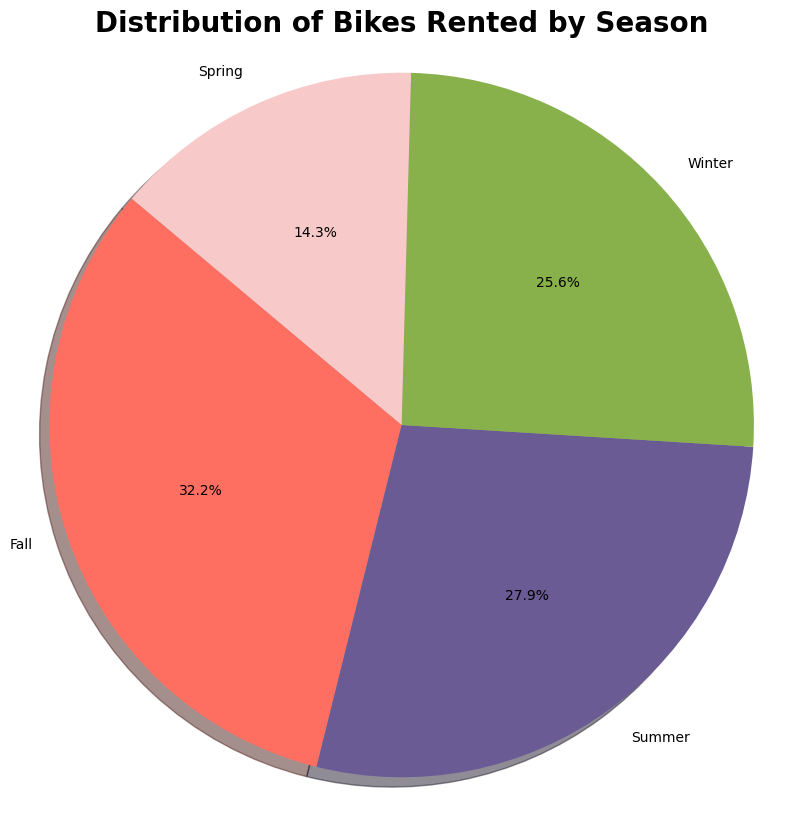

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for the pie chart
seasonal_totals = (
    day_data.groupby("season", observed=True)["grand_total"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

# Define a new color palette for better contrast
chart_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    seasonal_totals["grand_total"],
    labels=seasonal_totals["season"],
    autopct='%1.1f%%',  # Display percentage on the pie chart
    startangle=140,     # Start angle for the pie chart
    colors=chart_colors,
    shadow=True         # Add shadow for a 3D effect
)

# Title for the pie chart
plt.title("Distribution of Bikes Rented by Season", fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Display the pie chart
plt.show()


### Pertanyaan 2:

### 2. Pada jam berapa penyewaan sepeda mencapai puncak tertinggi dan terendah?

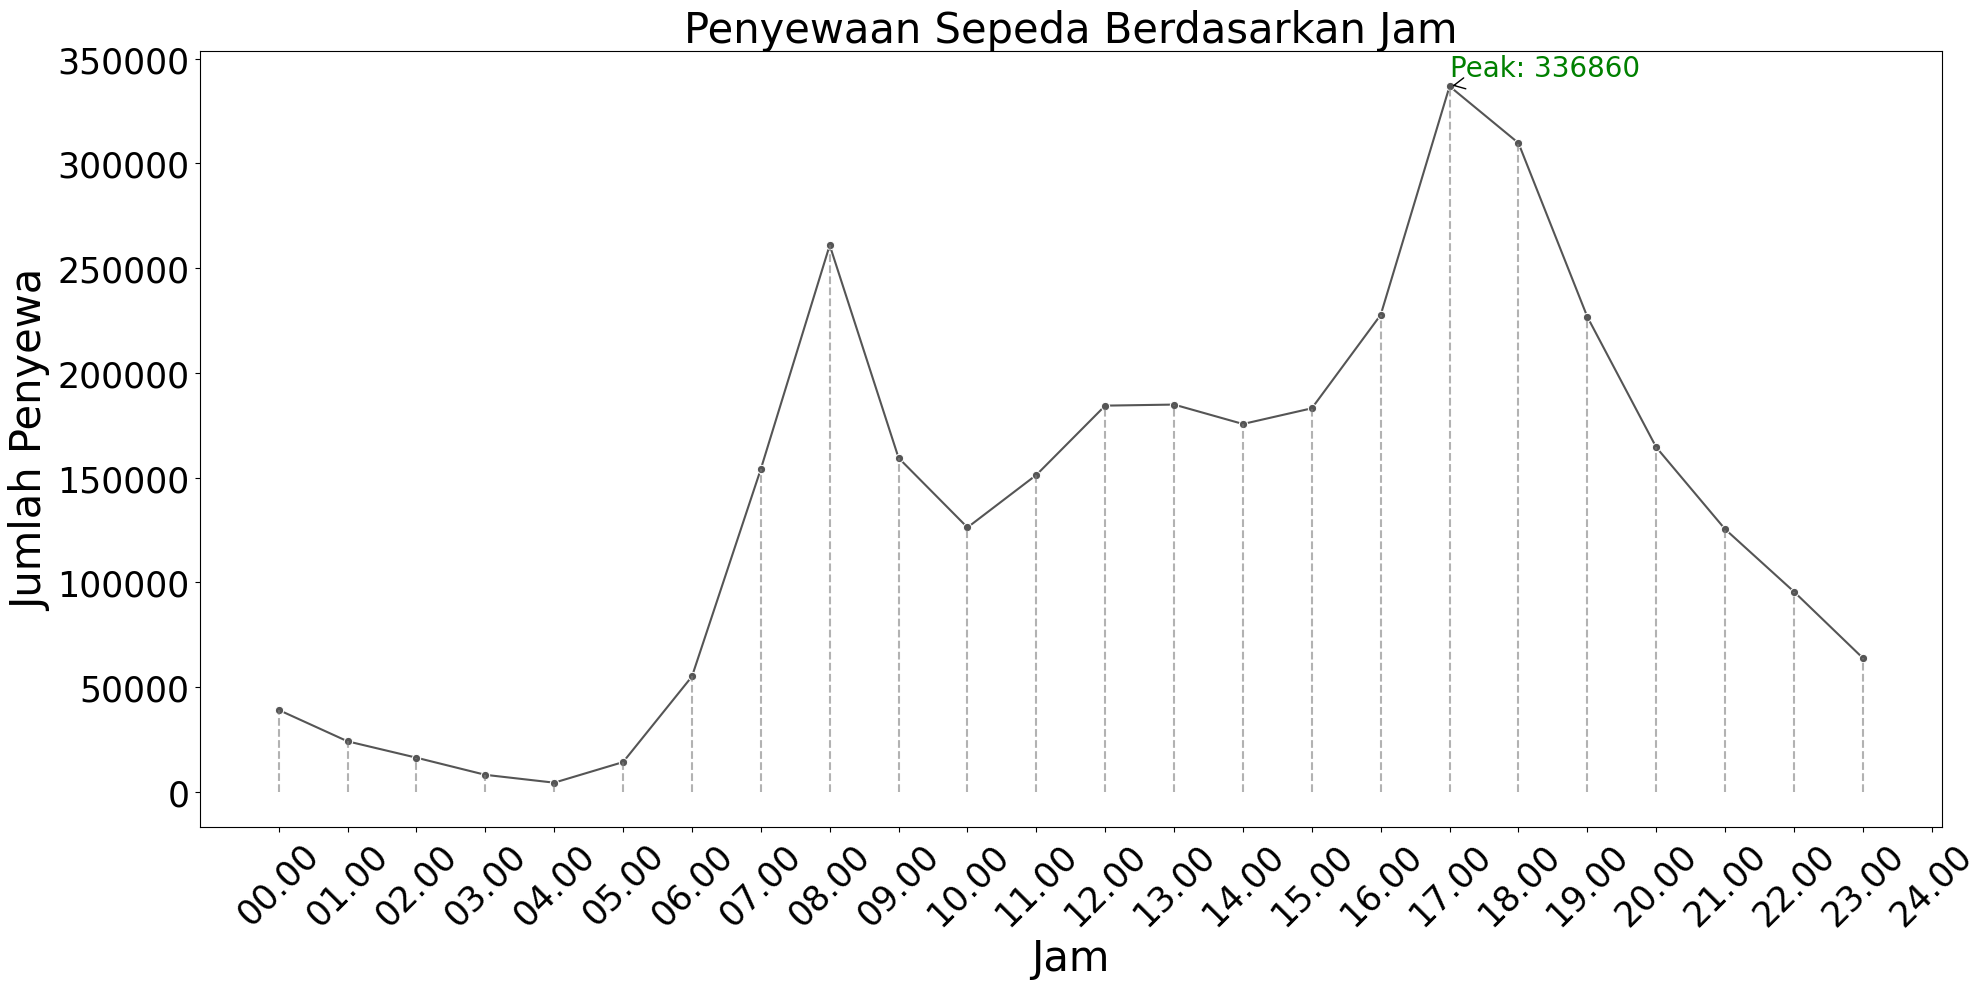

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `hour_data` is a DataFrame that you've already defined
sum_order_items_df = hour_data.groupby("hours")["grand_total"].sum().sort_values(ascending=False).reset_index()

# Membuat line chart
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat lineplot untuk jumlah penyewaan sepeda dengan warna yang lebih gelap
sns.lineplot(
    x="hours",
    y="grand_total",
    data=sum_order_items_df,
    marker='o',  # Menambahkan marker untuk menyoroti titik data
    color="#555555", 
)

# Menambahkan garis vertikal dari setiap titik data ke sumbu y
for i in range(len(sum_order_items_df)):
    ax.vlines(x=sum_order_items_df["hours"][i], 
               ymin=0, 
               ymax=sum_order_items_df["grand_total"][i], 
               color='grey', 
               linestyle='dashed', 
               alpha=0.6)

# Menentukan titik peak dan low
peak_value = sum_order_items_df["grand_total"].max()
low_value = sum_order_items_df["grand_total"].min()
peak_hour = sum_order_items_df.loc[sum_order_items_df["grand_total"].idxmax(), "hours"]
low_hour = sum_order_items_df.loc[sum_order_items_df["grand_total"].idxmin(), "hours"]

# Menambahkan anotasi untuk peak
ax.annotate(
    f'Peak: {peak_value}', 
    xy=(peak_hour, peak_value), 
    xytext=(peak_hour, peak_value + 5000),  # Posisi teks
    arrowprops=dict(facecolor='green', arrowstyle='->'),
    fontsize=20,
    color='green'
)

# Mengatur label dan judul untuk plot
ax.set_ylabel("Jumlah Penyewa", fontsize=30)
ax.set_xlabel("Jam", fontsize=30)
ax.set_title("Penyewaan Sepeda Berdasarkan Jam", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)

# Menambahkan label jam dari 00.00 hingga 24.00
xticks = [i for i in range(25)]  # Membuat daftar jam dari 0 hingga 24
ax.set_xticks(xticks)  # Mengatur tick di sumbu x
ax.set_xticklabels([f'{i:02}.00' for i in xticks], rotation=45)  # Format label jam

# Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan layout untuk tampilan yang rapi

# Menampilkan plot
plt.show()


### **Insight:**

Berdasarkan analisis grafik, musim dengan jumlah penyewaan sepeda tertinggi adalah musim gugur (Fall). 

Penyewaan sepeda paling banyak terjadi pada pukul 17.00, sementara pada pukul 04.00 jumlah penyewaannya jauh lebih rendah.

## Analisis Lanjutan (Opsional)

### Analisis Clustering pada Weather

In [20]:
# Menghitung jumlah nilai unik untuk setiap cuaca dengan observed=True
unique_weather_counts = hour_data.groupby("weather", observed=True).agg(lambda x: x.nunique())

# Mengurutkan hasil berdasarkan jumlah penyewaan dan menampilkan data
sorted_unique_weather_counts = unique_weather_counts.sort_values(by='grand_total', ascending=False)

# Menampilkan hasil akhir
print(sorted_unique_weather_counts)

                                                record_index  dateday  season  \
weather                                                                         
Clear                                                  11413      700       4   
Mist + Cloudy                                           4544      567       4   
Light Rain + Scattered clouds                           1419      300       4   
Heavy Rain + Ice Pallets + Thunderstorm + Mist             3        3       1   

                                                year  month  hours  holiday  \
weather                                                                       
Clear                                              2     12     24        2   
Mist + Cloudy                                      2     12     24        2   
Light Rain + Scattered clouds                      2     12     24        2   
Heavy Rain + Ice Pallets + Thunderstorm + Mist     2      1      3        1   

                                      

### **Insight:**

Cuaca Cerah (Clear) Dominan: Cuaca cerah mendominasi dengan jumlah kejadian tertinggi, yaitu 848 kali. Ini mengindikasikan bahwa wilayah yang diamati cenderung memiliki cuaca yang baik dalam periode pengamatan.

Cuaca Berkabut dan Mendung (Mist + Cloudy ) Cukup Sering: Kombinasi cuaca berkabut dan mendung terjadi cukup sering, sebanyak 649 kali. Ini menunjukkan bahwa kondisi cuaca yang tidak terlalu cerah juga cukup umum di wilayah tersebut.

Hujan Ringan (Light Rain + Scattered cloud) Terjadi Cukup Sering: Hujan ringan disertai awan berkelompok terjadi sebanyak 368 kali. Ini mengindikasikan bahwa hujan ringan merupakan jenis curah hujan yang cukup sering terjadi.

Cuaca Ekstrem (Heavy Rain + Ice Pallets + Thunderstorm + Mist) Sangat Jarang: Kombinasi cuaca ekstrem seperti hujan deras, hujan es, badai petir, dan kabut hanya terjadi 3 kali. Ini menunjukkan bahwa cuaca ekstrem sangat jarang terjadi di wilayah yang diamati.

## Conclusion

**Musim Penyewaan Tertinggi:**
Analisis menunjukkan bahwa musim gugur (fall) adalah waktu paling ramai untuk menyewa sepeda. Ini mungkin karena suhu yang lebih sejuk dan cuaca yang nyaman, mendorong banyak orang untuk beraktivitas di luar ruangan.
Jam Penyewaan Tertinggi: Puncak penyewaan terjadi pada pukul 17:00, kemungkinan besar karena banyak orang yang ingin bersepeda setelah seharian bekerja. Sebaliknya, pada pukul 04:00, penyewaan sangat minim, sesuai dengan waktu di mana orang biasanya masih tertidur.

**Kondisi Cuaca:**
Cuaca cerah mendominasi dengan 848 kejadian, menunjukkan bahwa wilayah ini sering kali menikmati hari-hari cerah, yang sangat mendukung aktivitas luar ruangan. Namun, kondisi berkabut dan mendung juga cukup umum terjadi, tercatat sebanyak 649 kali, yang tidak sepenuhnya menghalangi orang untuk bersepeda. Sementara itu, hujan ringan disertai awan berkelompok terjadi sebanyak 368 kali, mengindikasikan bahwa meskipun hujan ringan sering terjadi, orang tetap memilih untuk bersepeda. Cuaca ekstrem sangat jarang, hanya terjadi 3 kali, menunjukkan bahwa faktor cuaca ekstrem tidak menjadi penghalang bagi para penyewa.

**Interpretasi Hasil:**
Hasil analisis menunjukkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh musim dan waktu. Musim gugur menawarkan suhu yang nyaman dan cuaca yang mendukung, sehingga mendorong banyak orang untuk bersepeda. Waktu sore, menjelang pulang kerja, menjadi waktu favorit untuk menyewa sepeda.
Kondisi cuaca juga berperan penting. Meski ada hari-hari dengan hujan ringan dan mendung, data menunjukkan bahwa hal itu tidak sepenuhnya menghalangi orang untuk tetap beraktivitas di luar. Ini menunjukkan bahwa penyewaan sepeda tetap menjadi pilihan yang menarik bagi masyarakat.

**Kesimpulan:**
Dari hasil analisis, terlihat bahwa musim gugur dan jam sore adalah waktu yang paling baik untuk penyewaan sepeda. Cuaca cerah memberikan dampak positif bagi aktivitas luar ruangan. Dengan memahami wawasan ini, penyedia layanan penyewaan sepeda dapat mengambil keputusan yang lebih bijak dan strategis, sehingga meningkatkan penyewaan dan memberikan pengalaman yang lebih menyenangkan bagi pelanggan.